# Install packages

In [37]:
!pip install pandas matplotlib seaborn scipy windrose 



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!pip freeze > ../requirements.txt


# Importing libraries

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes


Extract datasets from the data.zip

In [40]:
import sys
sys.path.append('..')

from app.utils import extract_datasets

# data_folder = "/content/drive/MyDrive/data/"
data_folder = r"../"
data_path = os.path.join(data_folder, "data.zip")
extract_datasets(data_path, data_folder)


# Load dataset benin-malanville.csv and make initial analysis

In [41]:
data_folder = os.path.join(data_folder, "data")
df = pd.read_csv(os.path.join(data_folder, "benin-malanville.csv"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [42]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [43]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [44]:
# Check for missing values
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [45]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

# Statistics summary

In [46]:
# Summary statistics for numeric columns
df[['GHI', 'DNI', 'DHI', 'Tamb']].describe()

,GHI,DNI,DHI,Tamb
count,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,28.179683
std,331.131327,261.710501,158.691074,5.924297
min,-12.900000,-7.800000,-12.600000,11.000000
25%,-2.000000,-0.500000,-2.100000,24.200000
50%,1.800000,-0.100000,1.600000,28.000000
75%,483.400000,314.200000,216.300000,32.300000
max,1413.000000,952.300000,759.200000,43.800000


In [47]:
# Median of GHI
df['GHI'].median()

np.float64(1.8)

In [48]:
# Median of DNI
df['DNI'].median()

np.float64(-0.1)

In [49]:
# Median of DHI
df['DHI'].median()

np.float64(1.6)

In [50]:
# Median of Tamb
df['Tamb'].median()

np.float64(28.0)

Ploting GHI, DNI and DHI

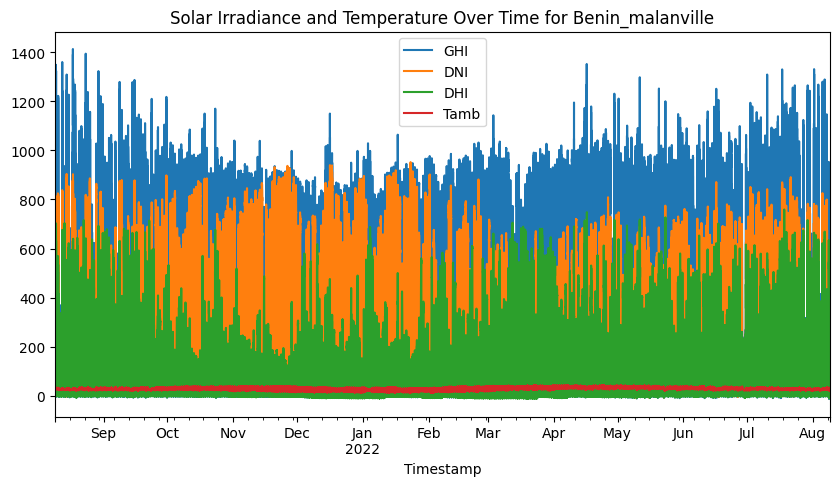

In [51]:
# Plotting time series trends for Benin_malanville dataset for the numeric columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(10, 5), title='Solar Irradiance and Temperature Over Time for Benin_malanville')
plt.show()

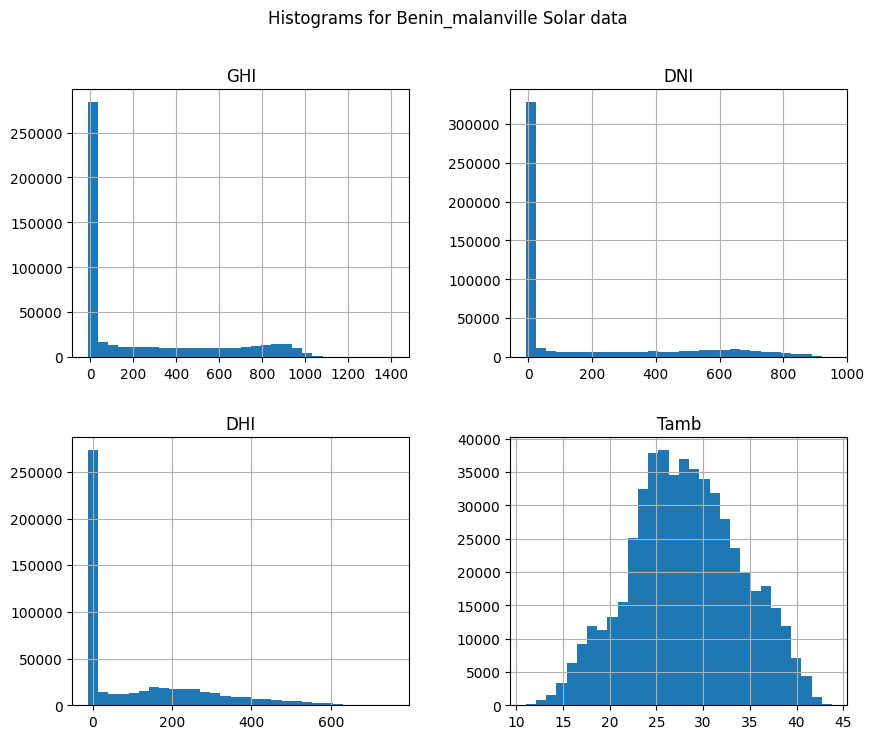

In [52]:
df[['GHI', 'DNI', 'DHI', 'Tamb']].hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms for Benin_malanville Solar data')
plt.show()

Check for potential outliers

In [53]:
zscores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
# zscores = df[['GHI', 'DNI', 'DHI', 'Tamb']].apply(zscore)
# zscores = df.apply(zscore)
zscores

,GHI,DNI,DHI
Timestamp,,,
2021-08-09 00:01:00,-0.730102,-0.639591,-0.733873
2021-08-09 00:02:00,-0.729800,-0.639591,-0.733873
2021-08-09 00:03:00,-0.729800,-0.639591,-0.733873
2021-08-09 00:04:00,-0.729800,-0.639209,-0.733243
2021-08-09 00:05:00,-0.729498,-0.639209,-0.733243
...,...,...,...
2022-08-08 23:56:00,-0.743088,-0.639209,-0.764120
2022-08-08 23:57:00,-0.743088,-0.639209,-0.763490
2022-08-08 23:58:00,-0.743088,-0.639209,-0.763490


In [54]:
# outliers = (zscores > 3).any(axis=1)
outliers = (zscores.abs() > 3).any(axis=1)
outliers.sum()

np.int64(3811)

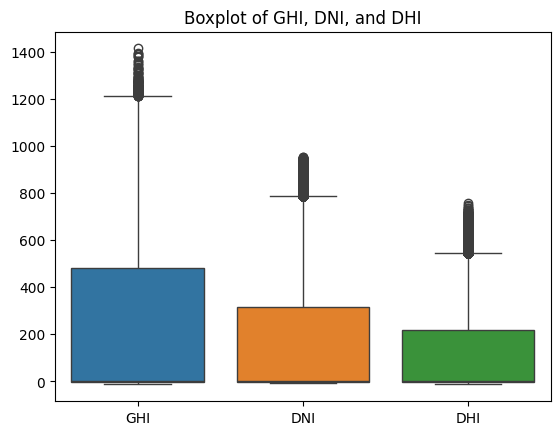

In [55]:
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Boxplot of GHI, DNI, and DHI')
plt.show()

<Axes: >

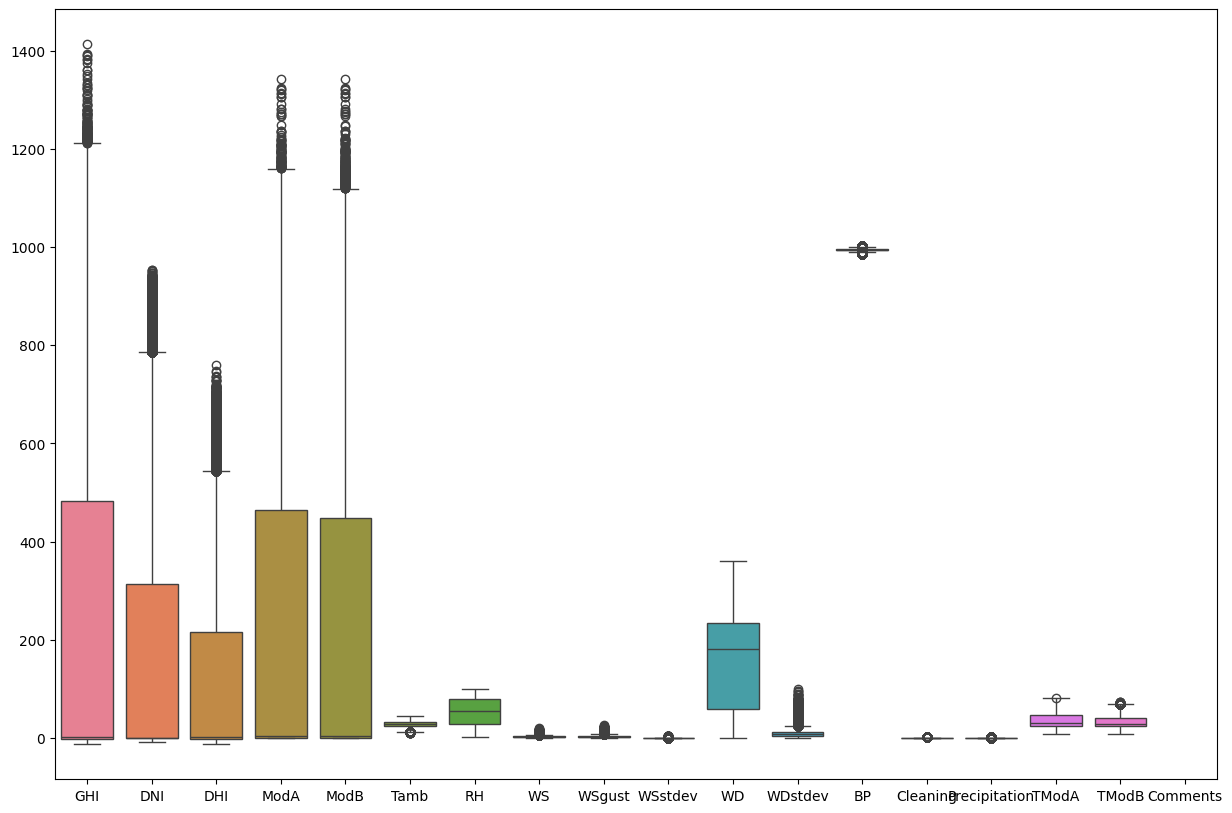

In [56]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)

Data Cleaning

In [57]:
# missing data
df.fillna(method='ffill', inplace=True) # forward fill
# df.fillna(method='bfill', inplace=True) # backward fill

C:\Users\Darkles\AppData\Local\Temp\ipykernel_22240\2401482676.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # forward fill


In [58]:
# drop duplicates
df.drop_duplicates(inplace=True)

Visializations and Correlation Analysis

In [59]:
correlation = df.corr()
correlation

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
GHI,1.000000,0.882098,0.849549,0.994428,0.994855,0.546475,-0.357267,0.454927,0.481863,0.443930,0.074302,0.545379,0.018966,0.006890,-0.036638,0.919972,0.874081,NaN
DNI,0.882098,1.000000,0.545455,0.891768,0.891757,0.466479,-0.371335,0.394827,0.417305,0.380831,0.013757,0.469314,0.031800,0.009840,-0.032990,0.789888,0.755497,NaN
DHI,0.849549,0.545455,1.000000,0.829431,0.827389,0.502725,-0.281707,0.424314,0.448366,0.411760,0.097518,0.503810,-0.007044,0.012983,-0.035718,0.824539,0.777252,NaN
ModA,0.994428,0.891768,0.829431,1.000000,0.998742,0.525775,-0.380644,0.456110,0.482194,0.440901,0.044738,0.536462,0.040400,0.006457,-0.036165,0.908796,0.855793,NaN
ModB,0.994855,0.891757,0.827389,0.998742,1.000000,0.524274,-0.363039,0.447702,0.474095,0.435915,0.056040,0.536455,0.041919,0.006908,-0.036098,0.911939,0.861946,NaN
Tamb,0.546475,0.466479,0.502725,0.525775,0.524274,1.000000,-0.412743,0.344276,0.359515,0.339021,0.183668,0.467756,-0.553420,-0.010197,-0.045985,0.760989,0.822825,NaN
RH,-0.357267,-0.371335,-0.281707,-0.380644,-0.363039,-0.412743,1.000000,-0.237059,-0.229029,-0.166944,0.296661,-0.210950,0.282406,0.006691,0.074546,-0.340746,-0.316749,NaN
WS,0.454927,0.394827,0.424314,0.456110,0.447702,0.344276,-0.237059,1.000000,0.984456,0.764384,0.230345,0.514399,0.044124,0.007641,0.126971,0.427010,0.397548,NaN
WSgust,0.481863,0.417305,0.448366,0.482194,0.474095,0.359515,-0.229029,0.984456,1.000000,0.839253,0.249050,0.564482,0.043587,0.008290,0.128870,0.456026,0.427189,NaN
WSstdev,0.443930,0.380831,0.411760,0.440901,0.435915,0.339021,-0.166944,0.764384,0.839253,1.000000,0.355001,0.614009,0.020457,0.007756,0.105587,0.437605,0.420045,NaN


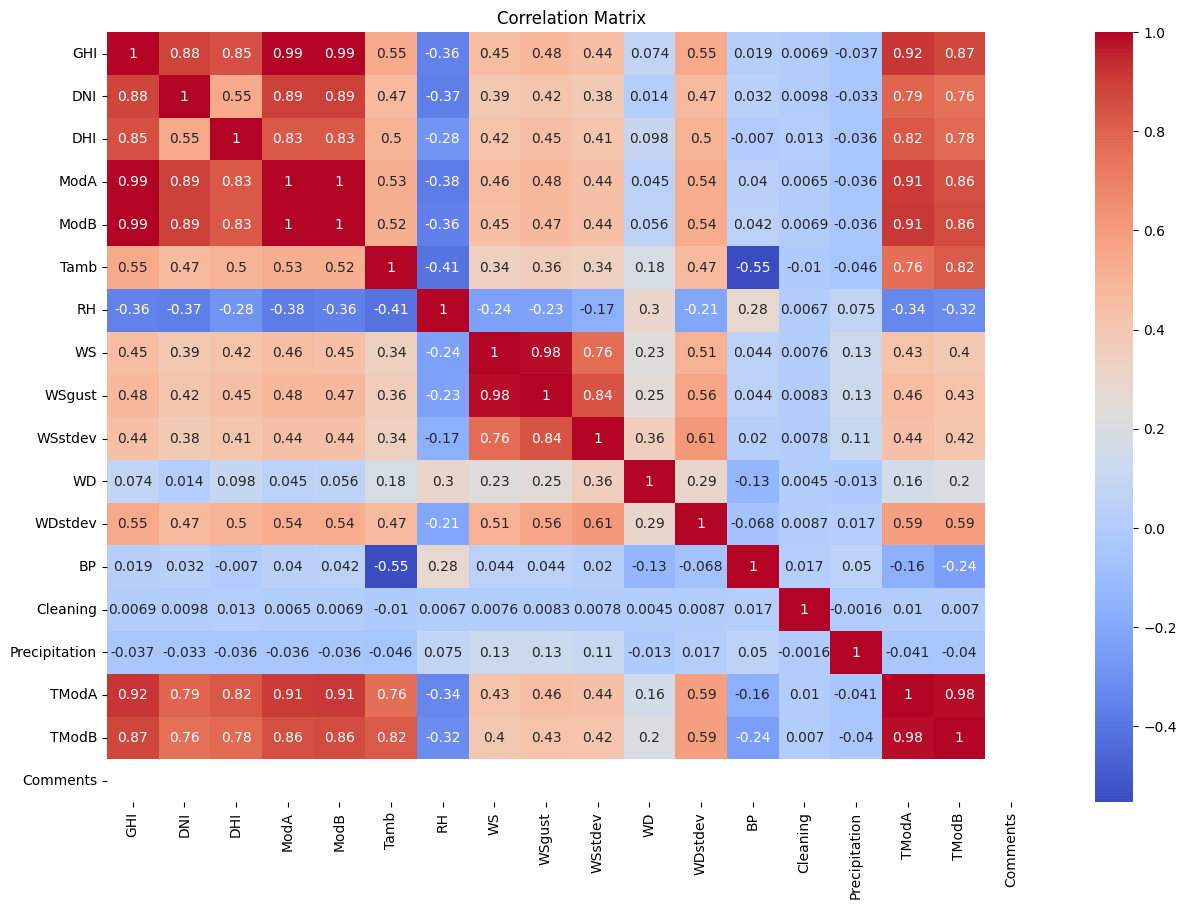

In [60]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

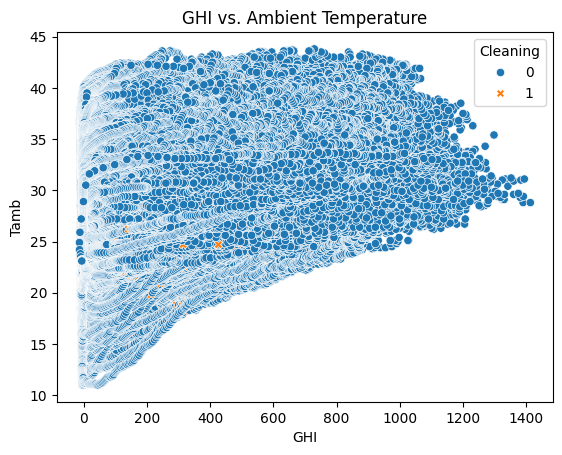

In [61]:
sns.scatterplot(x='GHI', y='Tamb', data=df, hue='Cleaning', style='Cleaning')
plt.title('GHI vs. Ambient Temperature')
plt.show()

Impact of the cleaning analysis done

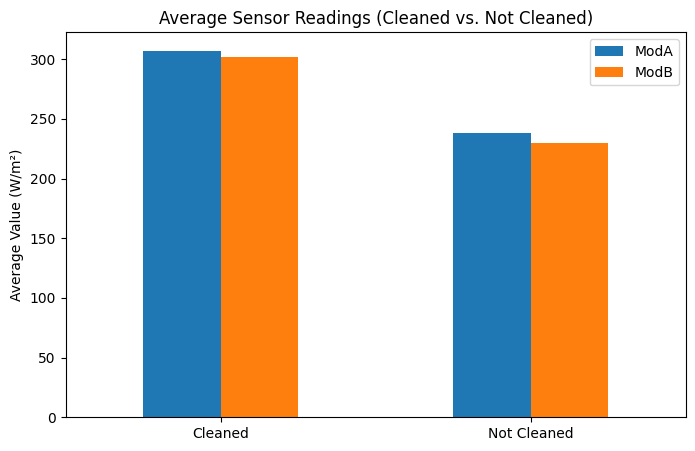

In [62]:
# Group data by Cleaning status
cleaned_data = df[df['Cleaning'] == 1]
not_cleaned_data = df[df['Cleaning'] == 0]

# Calculate average readings
avg_cleaned = cleaned_data[['ModA', 'ModB']].mean()
avg_not_cleaned = not_cleaned_data[['ModA', 'ModB']].mean()

# Bar chart comparison
avg_df = pd.DataFrame({'Cleaned': avg_cleaned, 'Not Cleaned': avg_not_cleaned}).T
avg_df.plot(kind='bar', figsize=(8, 5))
plt.title('Average Sensor Readings (Cleaned vs. Not Cleaned)')
plt.ylabel('Average Value (W/m²)')
plt.xticks(rotation=0)
plt.show()


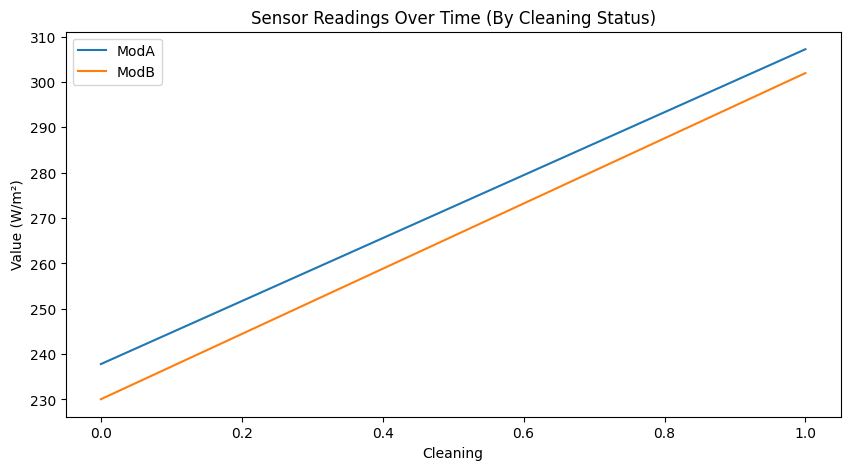

In [63]:
# check trends over time
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='line', figsize=(10, 5))
plt.title('Sensor Readings Over Time (By Cleaning Status)')
plt.ylabel('Value (W/m²)')
plt.show()

# Advanced Analysis with Correlation and Pair Plots

Wind analysis

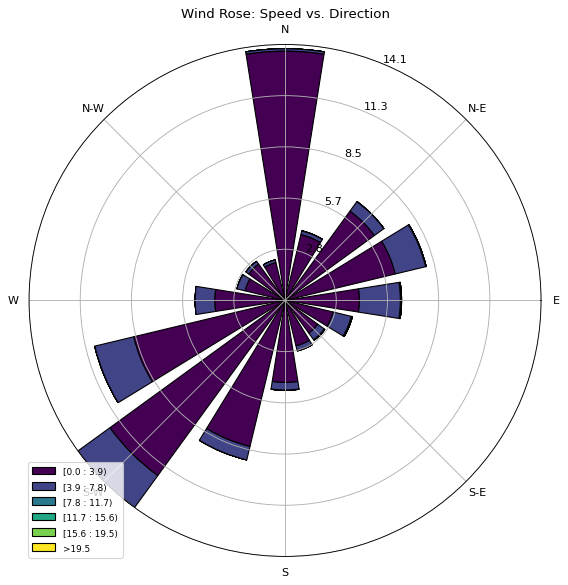

In [64]:
# Create a wind rose visualization to analyze speed and direction
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='black')
ax.set_title('Wind Rose: Speed vs. Direction')
ax.set_legend()
plt.show()

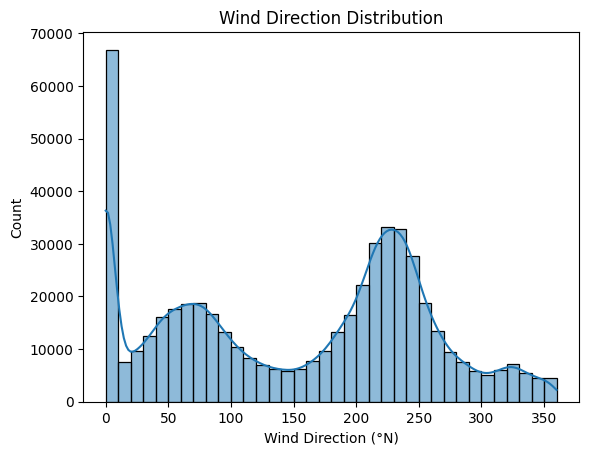

In [65]:
# Analyze wind direction variability
sns.histplot(df['WD'], kde=True, bins=36)
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction (°N)')
plt.show()

Temperature and Humidity Analysis

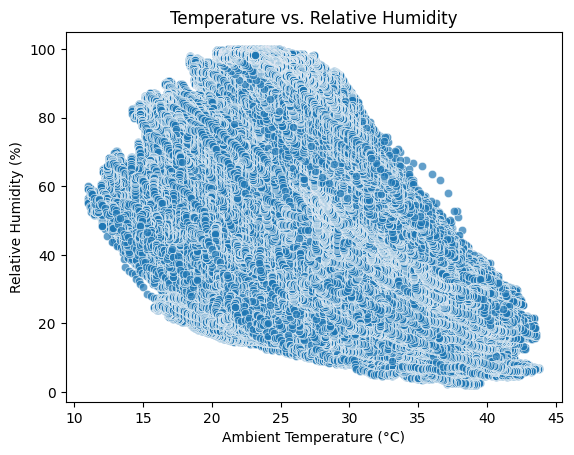

In [66]:
# Analyze the relationship between temperature and relative humidity
sns.scatterplot(x='Tamb', y='RH', data=df, alpha=0.7)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


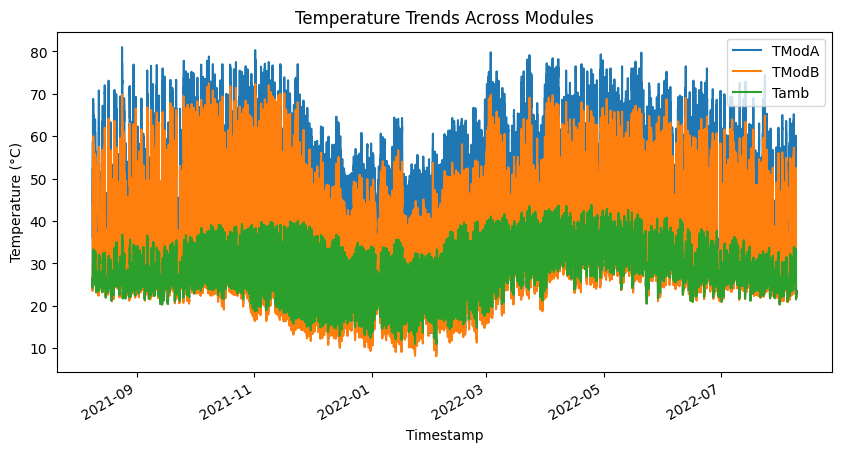

In [67]:
# Investigate temperature variations across modules
df[['TModA', 'TModB', 'Tamb']].plot(figsize=(10, 5))
plt.title('Temperature Trends Across Modules')
plt.ylabel('Temperature (°C)')
plt.show()


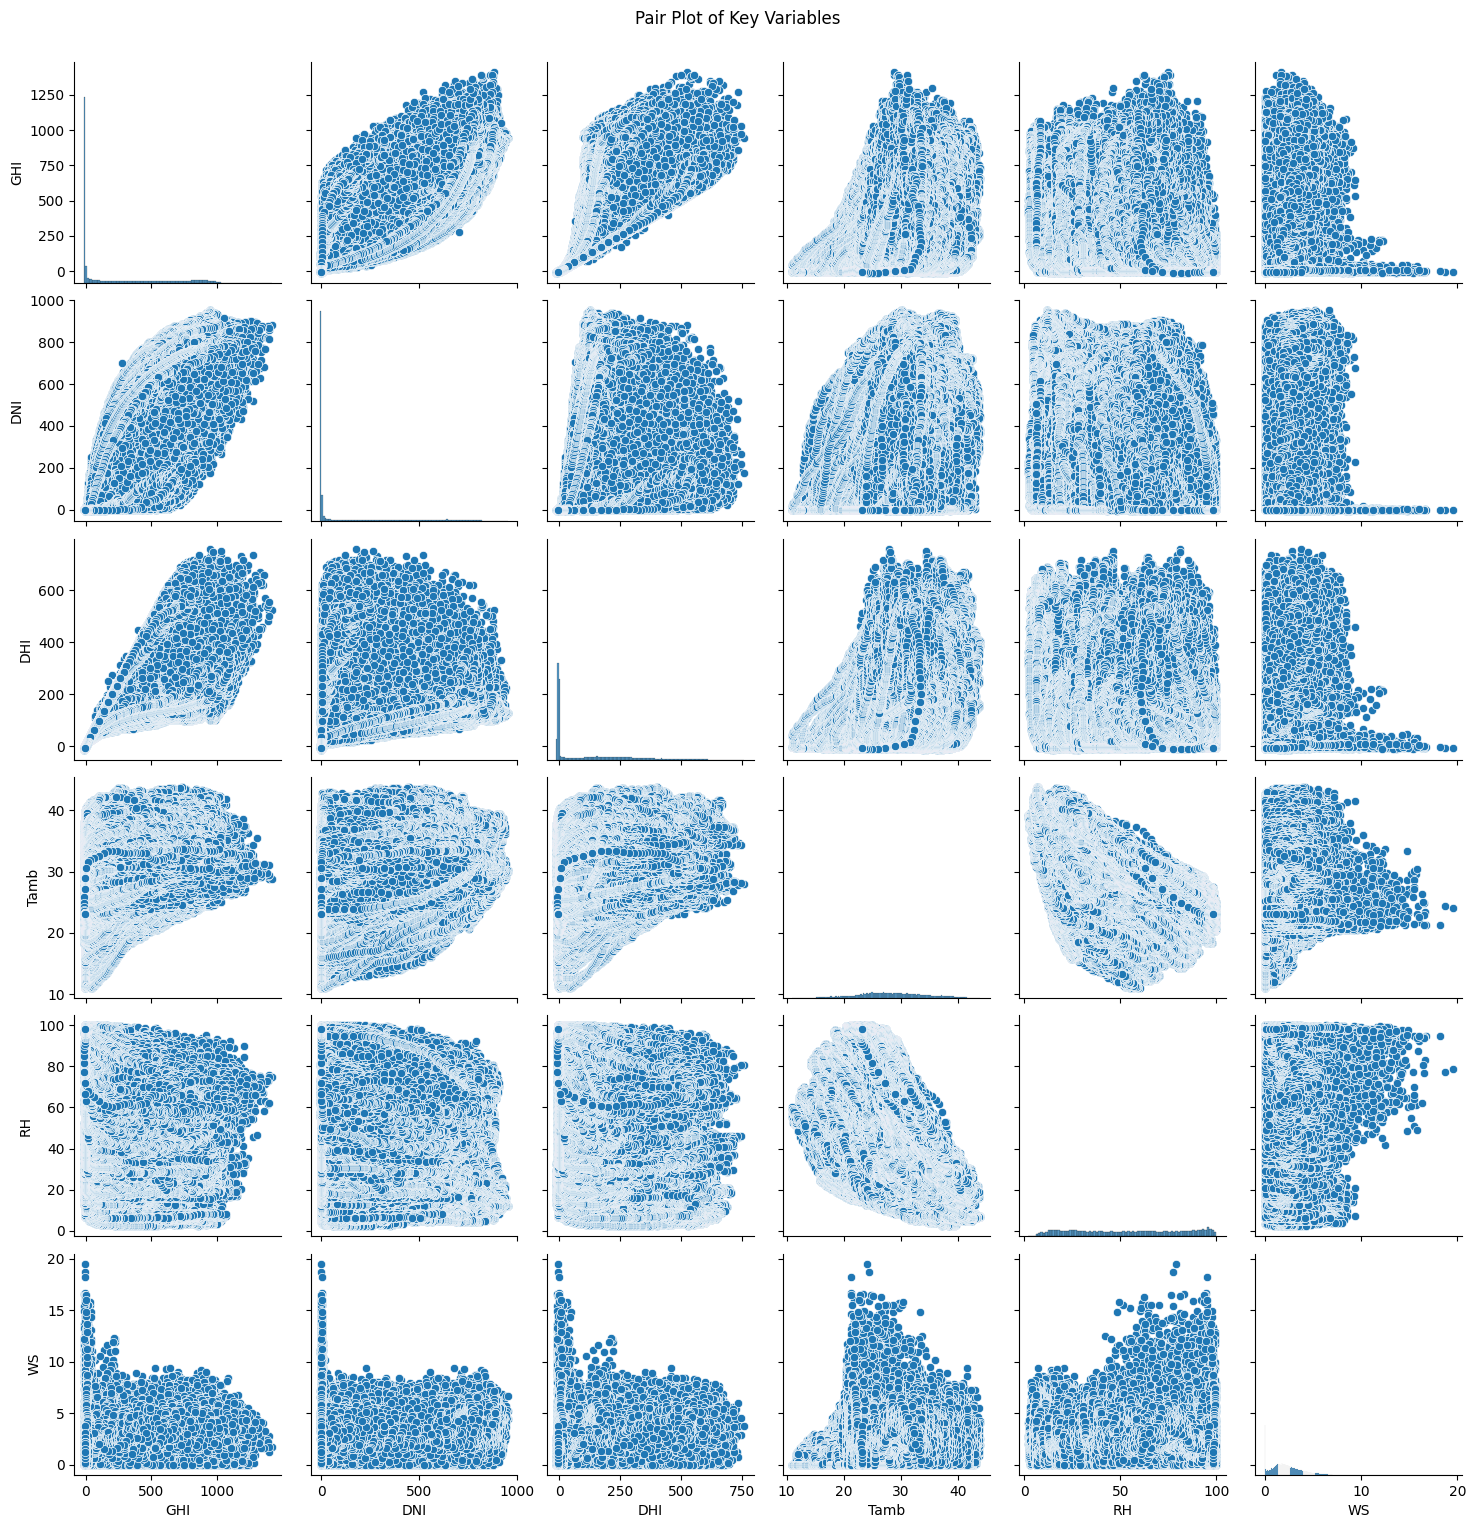

In [68]:
# Generate a pair plot
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

In [69]:
# Identify strong correlations between GHI, DNI, DHI Tamb, RH and WS
df[['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']].corr()

,GHI,DNI,DHI,Tamb,RH,WS
GHI,1.000000,0.882098,0.849549,0.546475,-0.357267,0.454927
DNI,0.882098,1.000000,0.545455,0.466479,-0.371335,0.394827
DHI,0.849549,0.545455,1.000000,0.502725,-0.281707,0.424314
Tamb,0.546475,0.466479,0.502725,1.000000,-0.412743,0.344276
RH,-0.357267,-0.371335,-0.281707,-0.412743,1.000000,-0.237059
WS,0.454927,0.394827,0.424314,0.344276,-0.237059,1.000000


 Z-Score and Outlier Detection for GHI, DNI and DHI

In [70]:
# Flag extreme outliers using Z-scores
z_scores = df[['GHI', 'DNI', 'DHI']].apply(zscore)
outlier_df = df[z_scores.abs() > 3].dropna()
outlier_df # Number of outliers detected

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,


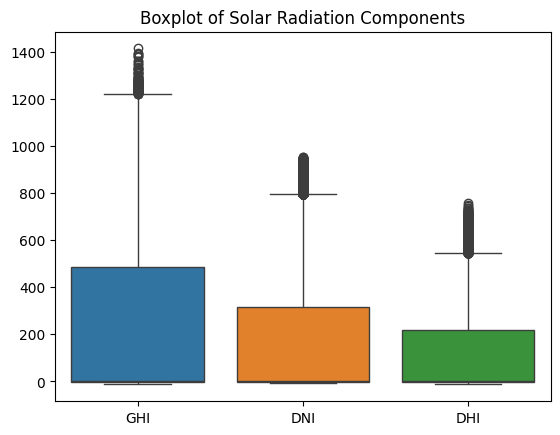

In [71]:
# Visualize outliers
sns.boxplot(data=df[['GHI', 'DNI', 'DHI']])
plt.title('Boxplot of Solar Radiation Components')
plt.show()
